Este avance consiste en construir un modelo de referencia que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podría indicar que el problema es intrínsecamente difícil o que los datos no contienen suficiente información para predecir el objetivo. De lo contrario, el baseline podría como una solución mínima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.

Un baseline facilita también la gestión de expectativas, tanto dentro del equipo como con los stakeholders, pues proporciona una comprensión inicial de lo que se puede lograr con métodos simples antes de invertir tiempo y recursos en enfoques más complejos.

Las siguientes son algunas de las preguntas que deberán abordar durante esta fase:

¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo? 
¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.
¿El modelo está sub/sobreajustando los datos de entrenamiento?
¿Cuál es la métrica adecuada para este problema de negocio? 
¿Cuál debería ser el desempeño mínimo a obtener?


## Equipo 7:

- Luis Salomon Flores Ugalde A00817435

### Importaciones

In [32]:
import os
import pickle
import pandas as pd
import subprocess
import graphviz
import matplotlib.pyplot as plt
import PIL.Image as Image

from torchsummary import summary
import seaborn as sns
import numpy as np

### Modelos

In [33]:
import torch
from pipelines.models.modular_cnn import CustomCNN
from pipelines.models.capsule import CustomCapsuleNet, DeepCapsuleNet
from pipelines.models.mlp import MLPMixer
from pipelines.models.dense import CustomDenseNet,DenseNet
from pipelines.models.effinet_b0 import EfficientNetClassifier
from pipelines.models.mobilenet_classifier import MobileNetClassifier
from pipelines.models.resnet18_classifier import ResNet18Classifier
from pipelines.models.vgg16_classifier import VGG16Classifier
from utils.plot import plot_all_class_cm


## Importación de Utilidades


In [34]:
num_workers = os.cpu_count()
print("Workers: "+ str(num_workers))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device: "+ device.type)


Workers: 12
device: cpu


In [35]:

dataset_name = 'KnightX_exp_dataset'
proyect_path =  "/Users/lsfu/Desktop/MNA/Integrador/MTTX"
process_path = "/Users/lsfu/Desktop/MNA/Integrador/MTTX/data/processed"
runs_path = "/Users/lsfu/Desktop/MNA/Integrador/MTTX/data/model/runs"
os.chdir(proyect_path) 
import yaml
with open("params.yaml", "r") as ymlfile:
    params = yaml.safe_load(ymlfile)
img_size = (params["image"]["size_x"], params["image"]["size_y"])

In [36]:
from pipelines.models.vit_classifier import ViTClassifier
from pipelines.models.dense import CustomDenseNet

model_dict = {
        "custom_cnn": CustomCNN(
            in_channels=params["models"]["custom_cnn"]["in_channels"],
            channel1=params["models"]["custom_cnn"]["channel1"],
            channel2=params["models"]["custom_cnn"]["channel2"],
            out_features=params["models"]["custom_cnn"]["out_features"],
            img_size=img_size
        ),
        "mlp": MLPMixer(
            in_channels=params["models"]["mlp"]["in_channels"],
            img_size=img_size[0],
            num_classes=params["models"]["mlp"]["num_classes"],
            patch_size=params["models"]["mlp"]["patch_size"],
            hidden_dim=params["models"]["mlp"]["hidden_dim"],
            num_layers=params["models"]["mlp"]["num_layers"]
        ),
        "deep_capsule": DeepCapsuleNet(
            in_channels=params["models"]["deep_capsule"]["in_channels"],
            conv1_out=params["models"]["deep_capsule"]["conv1_out"],
            conv2_out=params["models"]["deep_capsule"]["conv2_out"],
            capsule_dim=params["models"]["deep_capsule"]["capsule_dim"],
            num_capsules=params["models"]["deep_capsule"]["num_capsules"],
            num_classes=params["models"]["deep_capsule"]["num_classes"],
            img_size=img_size
        ),
        "capsule": CustomCapsuleNet(
            in_channels=params["models"]["capsule"]["in_channels"],
            conv_out=params["models"]["capsule"]["conv_out"],
            capsule_dim=params["models"]["capsule"]["capsule_dim"],
            num_capsules=params["models"]["capsule"]["num_capsules"],
            num_classes=params["models"]["capsule"]["num_classes"],
            img_size=img_size
        ),
        "dense": CustomDenseNet(
            in_channels=params["models"]["dense"]["in_channels"],
            growth_rate=params["models"]["dense"]["growth_rate"],
            num_layers=params["models"]["dense"]["num_layers"],
            out_features=params["models"]["dense"]["out_features"],
            img_size=img_size
        ),
        "densenet": DenseNet(
            in_channels=params["models"]["densenet"]["in_channels"],
            growth_rate=params["models"]["densenet"]["growth_rate"],
            num_layers=params["models"]["densenet"]["num_layers"],
            out_features=params["models"]["densenet"]["out_features"],
            reduction=params["models"]["densenet"]["reduction"],
            drop_rate=params["models"]["densenet"]["drop_rate"],
        ),
        "efficientnet": EfficientNetClassifier(),
        "mobilenet": MobileNetClassifier(),
        "resnet18": ResNet18Classifier(),
        "vgg16": VGG16Classifier(),
        "vit": ViTClassifier(),
    }

In [37]:
!dvc repro

Stage 'load.compute_mean_std' didn't change, skipping                           
Stage 'load.train_data' didn't change, skipping                                 
Stage 'preprocess.extract_boxes' didn't change, skipping                        
Stage 'preprocess.filter_faces' didn't change, skipping                         
Stage 'preprocess.refine_faces' didn't change, skipping                         
Stage 'preprocess.apply_clahe_unsharp' didn't change, skipping                  
Stage 'preprocess.extract_dlib_landmarks' didn't change, skipping               
Stage 'preprocess.crop_resize_convert' didn't change, skipping                  
Stage 'train_custom_cnn' didn't change, skipping                                
Stage 'train_mlp' didn't change, skipping                                       
Stage 'train_deep_capsule' didn't change, skipping                              
Stage 'train_capsule' didn't change, skipping                                   
Stage 'train_dense' didn't c

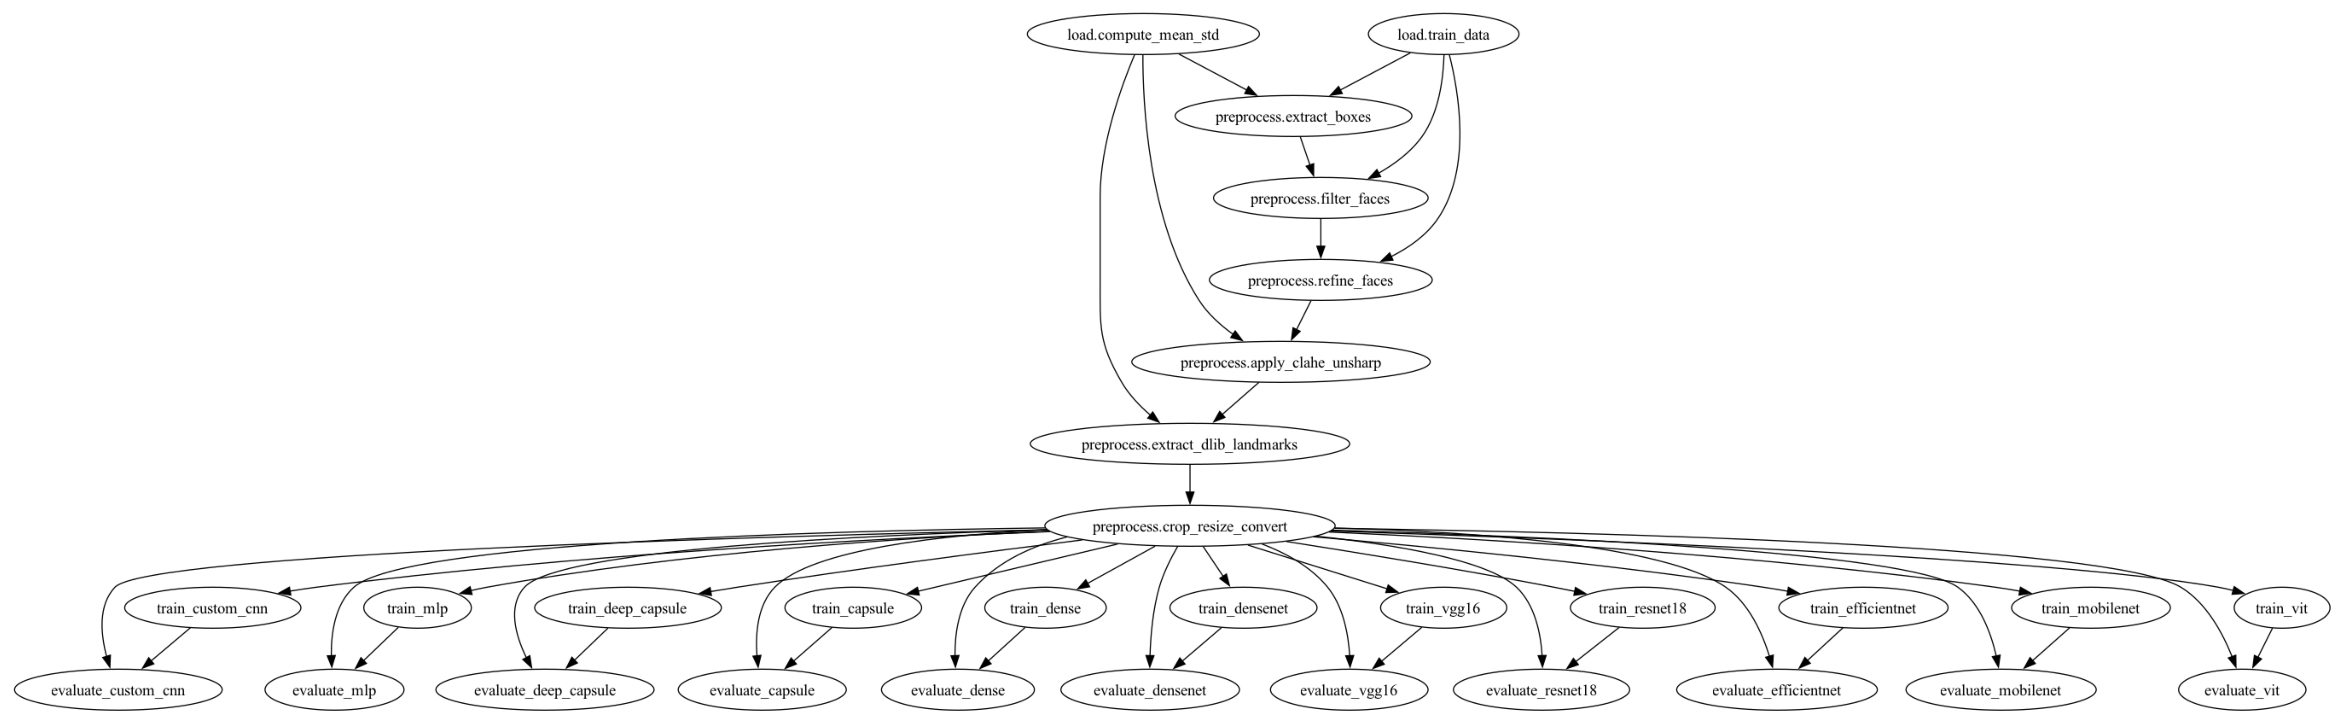

In [38]:

# Generate DAG as a DOT file
dag_dot = subprocess.run(["dvc", "dag", "--dot"], capture_output=True, text=True).stdout

# Render the DAG to an image file
dag_path = "dvc_pipeline"
graphviz.Source(dag_dot).render(dag_path, format="png", cleanup=True)

# Load the image using PIL
dag_image = Image.open(f"{dag_path}.png")

# Plot the image using Matplotlib
fig, ax = plt.subplots(figsize=(30, 24))
ax.imshow(dag_image)
ax.axis("off") 
plt.show()



In [39]:
label_map = {0: "angry", 1: "contempt", 2: "disgust", 3: "fear", 4: "happy", 5: "neutral", 6: "sad", 7: "surprise"}
label_names = ["angry","contempt","disgust", "fear","happy","neutral", "sad","surprise"]


In [40]:
# Load parameters from YAML

model_names = list(params["models"].keys())

model_name_dict = {i + 1: name for i, name in enumerate(model_names)}

model_name_dict

{1: 'custom_cnn',
 2: 'mlp',
 3: 'deep_capsule',
 4: 'capsule',
 5: 'dense',
 6: 'densenet',
 7: 'efficientnet',
 8: 'mobilenet',
 9: 'resnet18',
 10: 'vgg16',
 11: 'vit'}

In [41]:
Two_channel_in = (32,2, img_size[0],img_size[1])
Three_channel_in = (32,3, img_size[0],img_size[1])

In [42]:
def load_model_and_metrics(index):
    model_name = model_name_dict[index]
    cm_file = f"conf_matrix_{model_name}.pkl"
    model_torch = f"{model_name}.pth"
    metrics_file = f"metrics_{model_name}.pkl"
    with open(os.path.join(process_path, cm_file), "rb") as f:
        cm = pickle.load(f)
    with open(os.path.join(process_path, metrics_file), "rb") as f:
        classes_df, macro_df = pickle.load(f)
    model = model_dict[model_name]
    model_path = os.path.join(runs_path, model_torch)
    state_dict = torch.load(model_path, map_location="cpu")  # Load state dict with map_location
    model.load_state_dict(state_dict)  # Load it into the model

    return model, cm, classes_df, macro_df

In [43]:
from torchinfo import summary
def print_model_summary(model, input_size):
    model_summary = summary(model, input_size, verbose=1)
    #print(model_summary)  

In [44]:
def plot_confuse_matrix(confuse_matrix, class_labels=None):
    cm = confuse_matrix
    num_classes = cm.shape[0]
    if class_labels is None:
        class_labels = [f"Clase {i}" for i in range(num_classes)]

    cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100  # Normalize per class

    cell_labels = [[f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%" for j in range(num_classes)] for i in range(num_classes)]

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm_percent, annot=np.array(cell_labels), fmt='', cmap="Pastel1", xticklabels=class_labels,
                     yticklabels=class_labels, cbar=False)
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    ax.set_title("Confusion Matrix with Counts and Percentages")
    plt.show()

## Custom CNN 
Red convolucional simple, rapida

Layer (type:depth-idx)                   Output Shape              Param #
CustomCNN                                [32, 8]                   --
├─CNN_custom: 1-1                        [32, 32, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 32, 224, 224]        608
│    └─BatchNorm2d: 2-2                  [32, 32, 224, 224]        64
│    └─Conv2d: 2-3                       [32, 32, 224, 224]        9,248
│    └─BatchNorm2d: 2-4                  [32, 32, 224, 224]        64
│    └─MaxPool2d: 2-5                    [32, 32, 112, 112]        --
├─CNN_custom: 1-2                        [32, 64, 56, 56]          --
│    └─Conv2d: 2-6                       [32, 64, 112, 112]        18,496
│    └─BatchNorm2d: 2-7                  [32, 64, 112, 112]        128
│    └─Conv2d: 2-8                       [32, 64, 112, 112]        36,928
│    └─BatchNorm2d: 2-9                  [32, 64, 112, 112]        128
│    └─MaxPool2d: 2-10                   [32, 64, 56, 56]          --
├

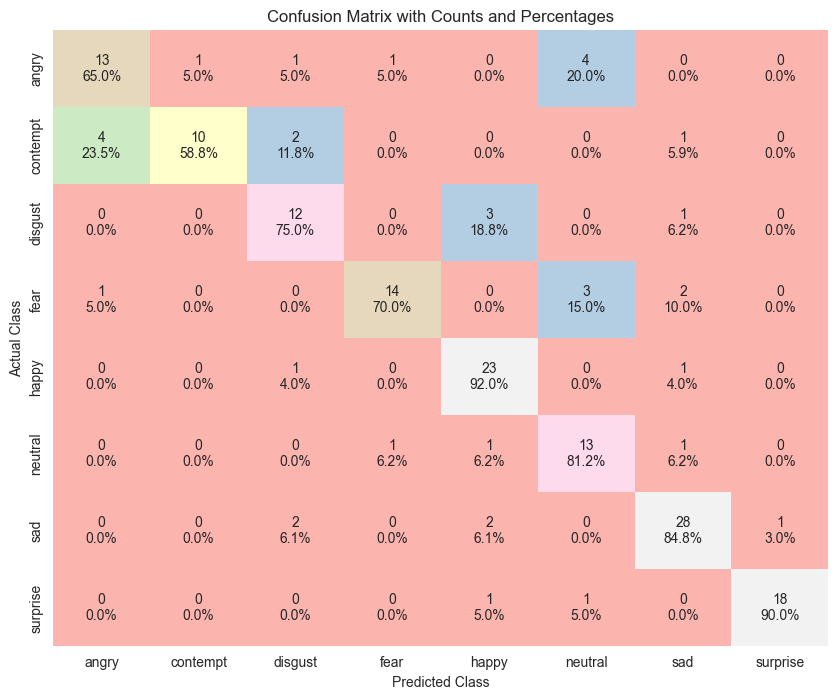

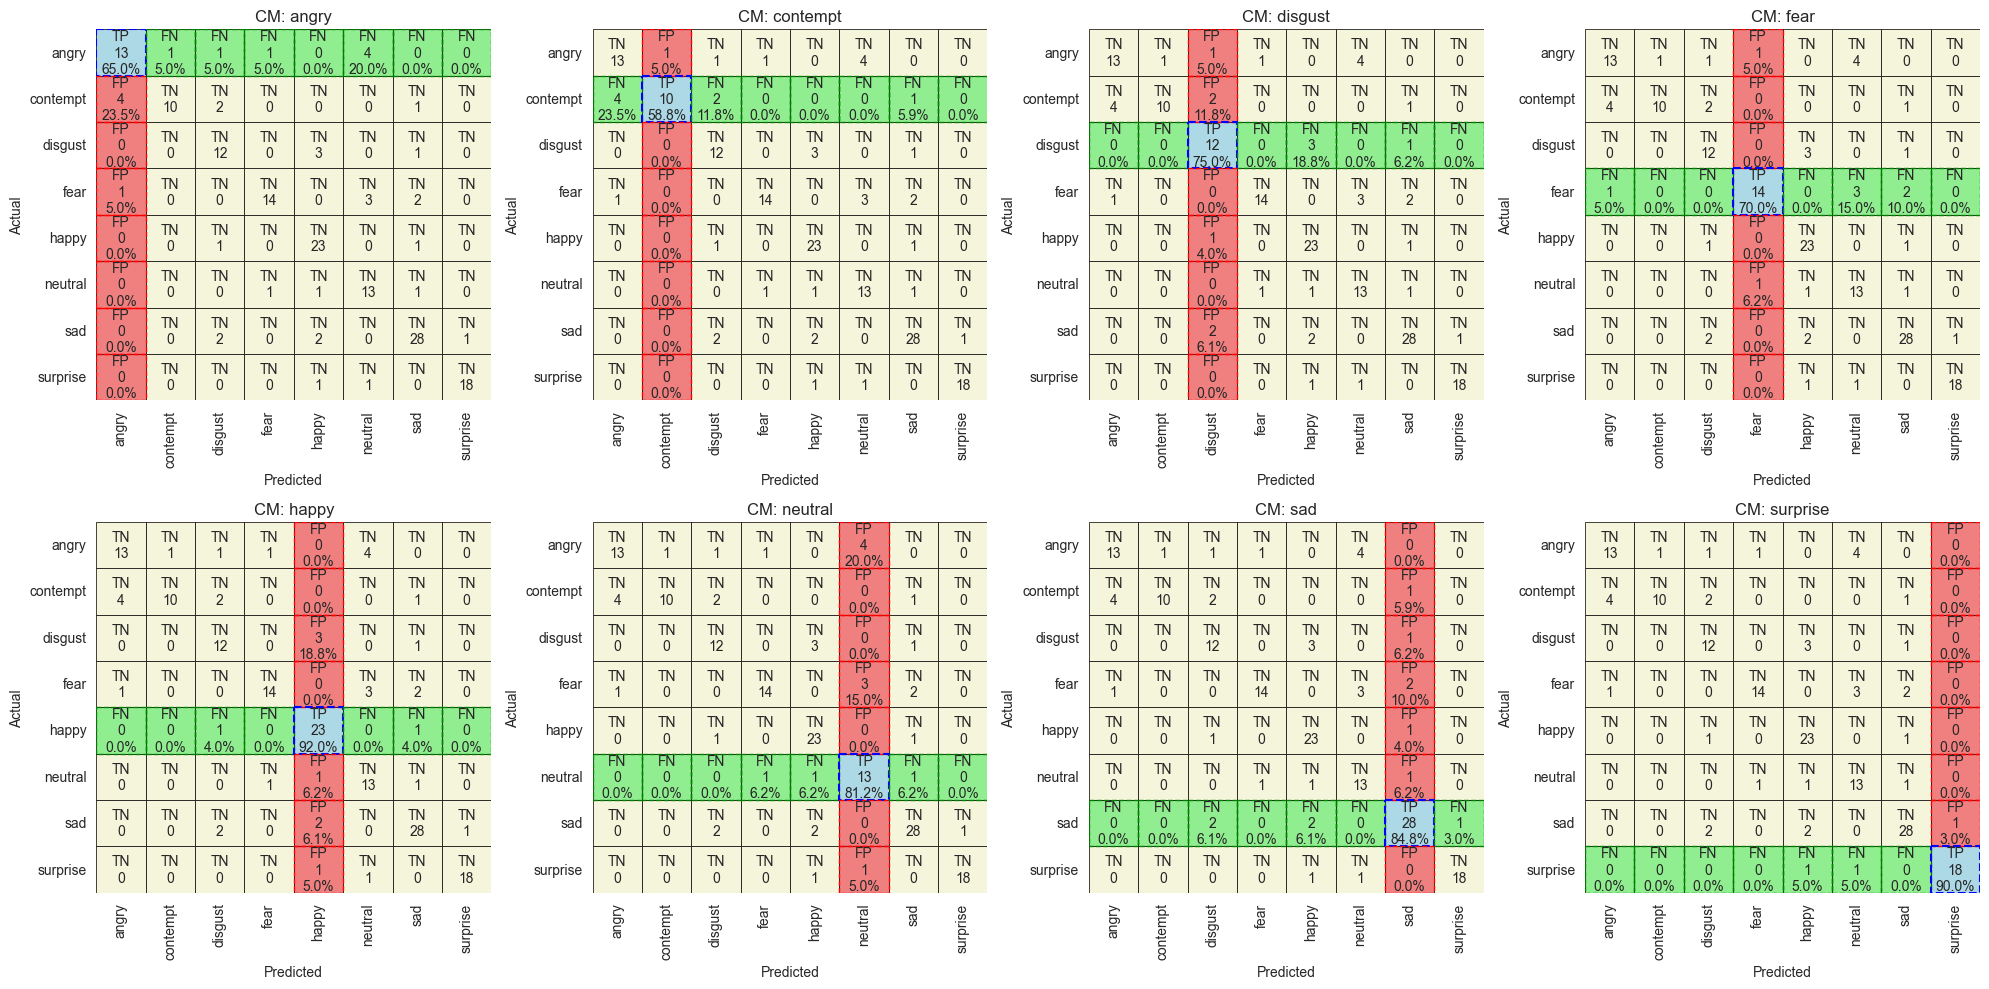

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.650000,0.350000,0.965986,0.034014,0.722222,0.277778,0.953020,0.046980,0.684211
contempt,0.588235,0.411765,0.993333,0.006667,0.909091,0.090909,0.955128,0.044872,0.714286
disgust,0.750000,0.250000,0.960265,0.039735,0.666667,0.333333,0.973154,0.026846,0.705882
fear,0.700000,0.300000,0.986395,0.013605,0.875000,0.125000,0.960265,0.039735,0.777778
happy,0.920000,0.080000,0.950704,0.049296,0.766667,0.233333,0.985401,0.014599,0.836364
neutral,0.812500,0.187500,0.947020,0.052980,0.619048,0.380952,0.979452,0.020548,0.702703
sad,0.848485,0.151515,0.955224,0.044776,0.823529,0.176471,0.962406,0.037594,0.835821
surprise,0.900000,0.100000,0.993197,0.006803,0.947368,0.052632,0.986486,0.013514,0.923077


                                     Valor
Recall (Sensitivity)              0.771153
Miss Rate                         0.228847
Specificity (Selectivity)         0.969016
Fallout                           0.030984
Precision                         0.791199
False Discovery Rate (FDR)        0.208801
Negative Predictive Value (NPV)   0.969414
False Omission Rate (FOR)         0.030586
F1 Score                          0.772515
MCC                               0.753636
Accuracy                         78.443114
Training Time                    26.547500
Inference Time                    0.220614


In [45]:
from IPython.core.display import display, HTML
model_index = 1
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

### MLPMixer


Layer (type:depth-idx)                   Output Shape              Param #
MLPMixer                                 [32, 8]                   --
├─Conv2d: 1-1                            [32, 256, 14, 14]         131,328
├─Sequential: 1-2                        [32, 196, 256]            --
│    └─MLPBlock: 2-1                     [32, 196, 256]            --
│    │    └─LayerNorm: 3-1               [32, 196, 256]            512
│    │    └─Linear: 3-2                  [32, 196, 1024]           263,168
│    │    └─GELU: 3-3                    [32, 196, 1024]           --
│    │    └─Linear: 3-4                  [32, 196, 256]            262,400
│    └─MLPBlock: 2-2                     [32, 196, 256]            --
│    │    └─LayerNorm: 3-5               [32, 196, 256]            512
│    │    └─Linear: 3-6                  [32, 196, 1024]           263,168
│    │    └─GELU: 3-7                    [32, 196, 1024]           --
│    │    └─Linear: 3-8                  [32, 196, 256]        

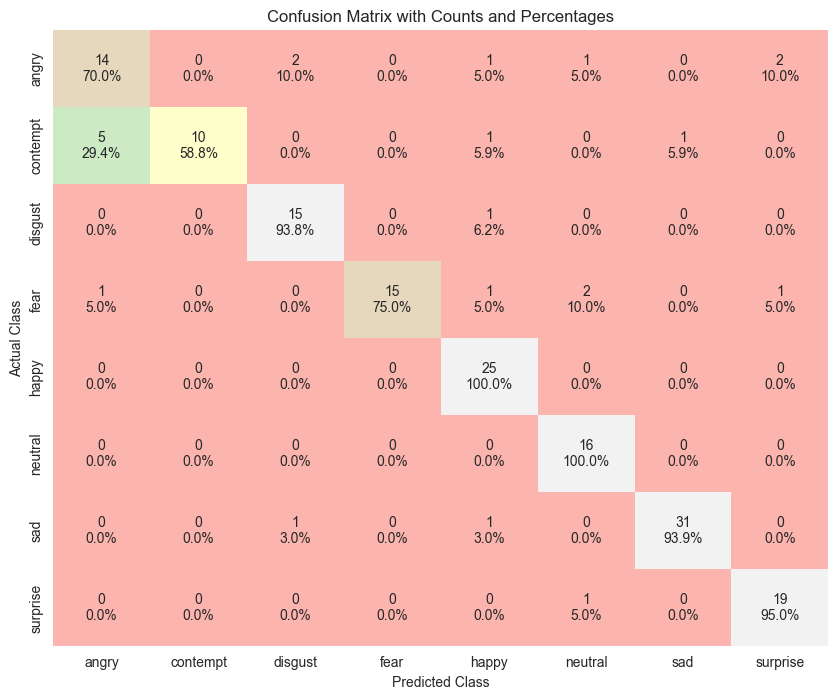

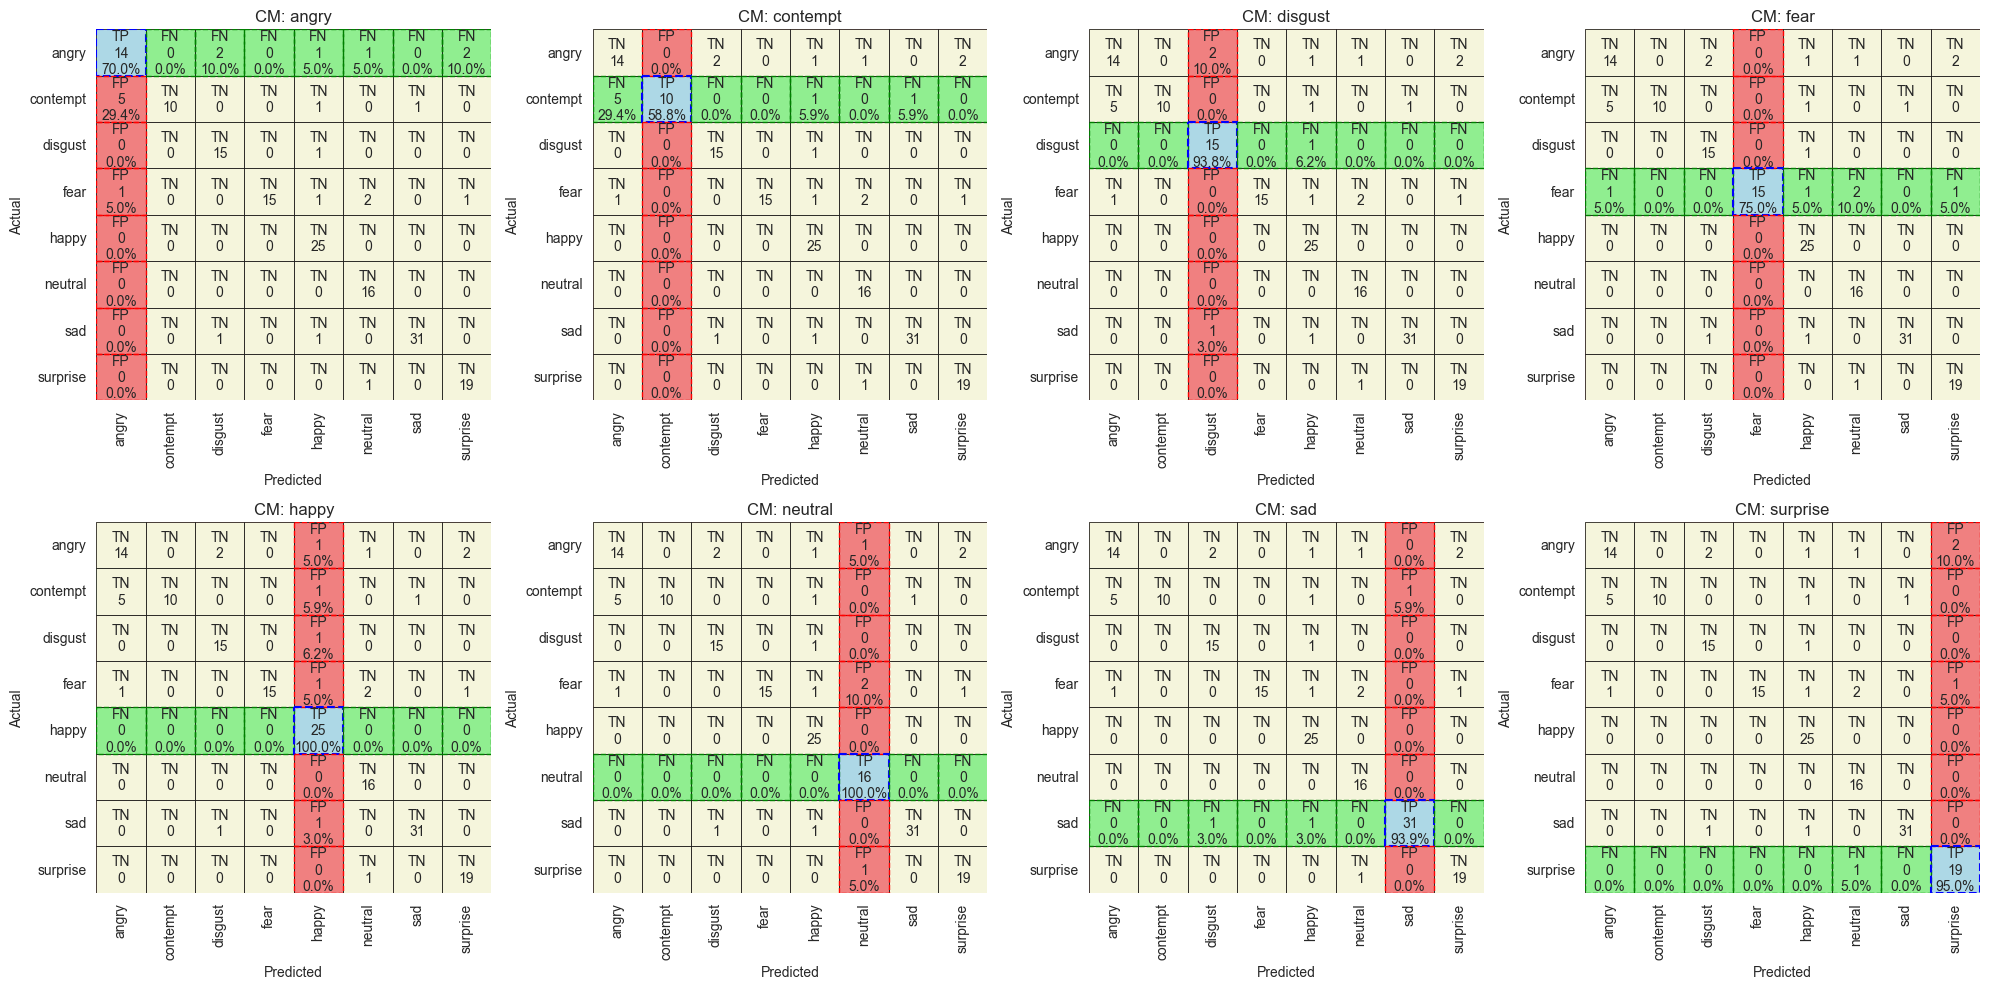

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.700000,0.300000,0.959184,0.040816,0.700000,0.300000,0.959184,0.040816,0.700000
contempt,0.588235,0.411765,1.000000,0.000000,1.000000,0.000000,0.955414,0.044586,0.740741
disgust,0.937500,0.062500,0.980132,0.019868,0.833333,0.166667,0.993289,0.006711,0.882353
fear,0.750000,0.250000,1.000000,0.000000,1.000000,0.000000,0.967105,0.032895,0.857143
happy,1.000000,0.000000,0.964789,0.035211,0.833333,0.166667,1.000000,0.000000,0.909091
neutral,1.000000,0.000000,0.973510,0.026490,0.800000,0.200000,1.000000,0.000000,0.888889
sad,0.939394,0.060606,0.992537,0.007463,0.968750,0.031250,0.985185,0.014815,0.953846
surprise,0.950000,0.050000,0.979592,0.020408,0.863636,0.136364,0.993103,0.006897,0.904762


                                     Valor
Recall (Sensitivity)              0.858141
Miss Rate                         0.141859
Specificity (Selectivity)         0.981218
Fallout                           0.018782
Precision                         0.874882
False Discovery Rate (FDR)        0.125118
Negative Predictive Value (NPV)   0.981660
False Omission Rate (FOR)         0.018340
F1 Score                          0.854603
MCC                               0.849444
Accuracy                         86.826347
Training Time                    10.839000
Inference Time                    0.185000


In [46]:
model_index = 2
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

### Deep Capsule

Layer (type:depth-idx)                   Output Shape              Param #
DeepCapsuleNet                           [32, 8]                   --
├─Conv2d: 1-1                            [32, 32, 224, 224]        1,632
├─Conv2d: 1-2                            [32, 64, 224, 224]        51,264
├─Conv2d: 1-3                            [32, 256, 108, 108]       1,327,360
├─Linear: 1-4                            [32, 128]                 382,206,080
Total params: 383,586,336
Trainable params: 383,586,336
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 592.60
Input size (MB): 12.85
Forward/backward pass size (MB): 1997.57
Params size (MB): 1534.35
Estimated Total Size (MB): 3544.76


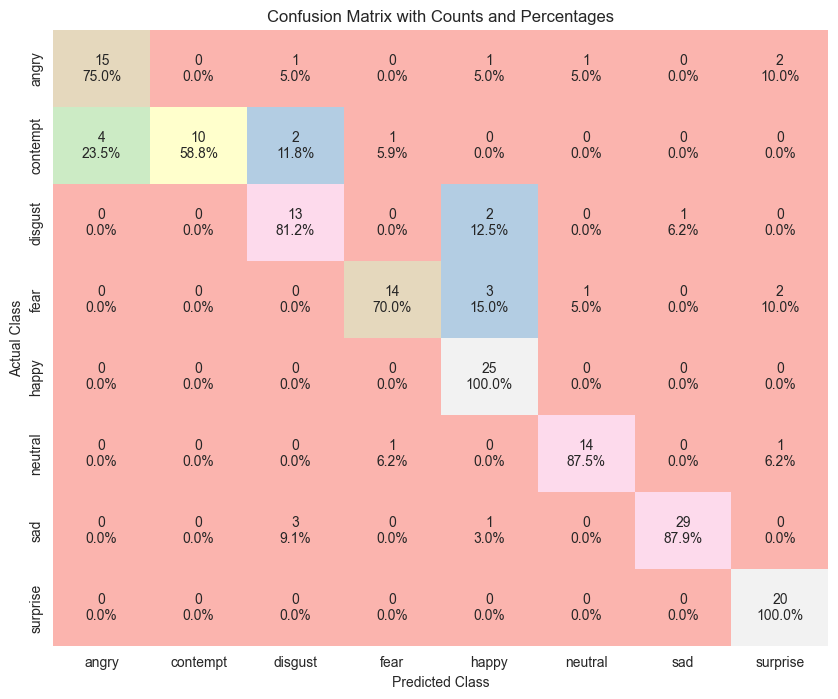

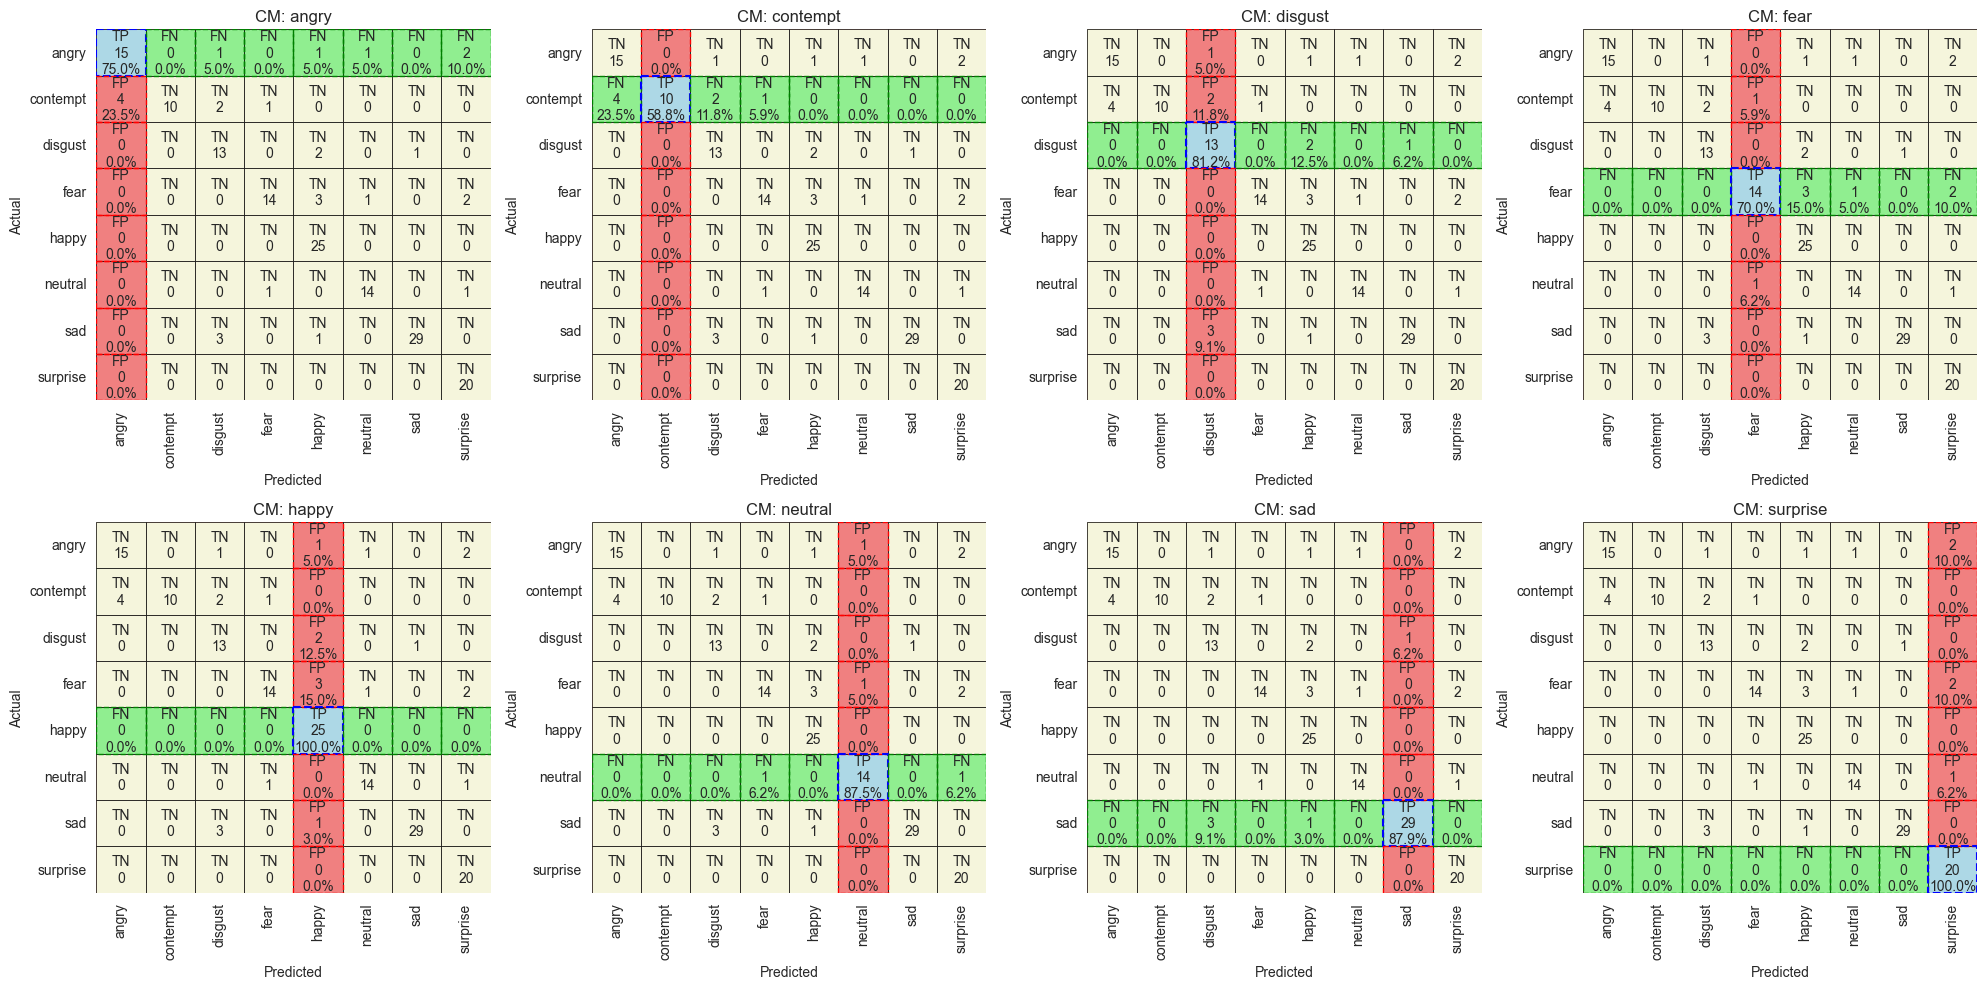

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.750000,0.250000,0.972789,0.027211,0.789474,0.210526,0.966216,0.033784,0.769231
contempt,0.588235,0.411765,1.000000,0.000000,1.000000,0.000000,0.955414,0.044586,0.740741
disgust,0.812500,0.187500,0.960265,0.039735,0.684211,0.315789,0.979730,0.020270,0.742857
fear,0.700000,0.300000,0.986395,0.013605,0.875000,0.125000,0.960265,0.039735,0.777778
happy,1.000000,0.000000,0.950704,0.049296,0.781250,0.218750,1.000000,0.000000,0.877193
neutral,0.875000,0.125000,0.986755,0.013245,0.875000,0.125000,0.986755,0.013245,0.875000
sad,0.878788,0.121212,0.992537,0.007463,0.966667,0.033333,0.970803,0.029197,0.920635
surprise,1.000000,0.000000,0.965986,0.034014,0.800000,0.200000,1.000000,0.000000,0.888889


                                      Valor
Recall (Sensitivity)               0.825565
Miss Rate                          0.174435
Specificity (Selectivity)          0.976929
Fallout                            0.023071
Precision                          0.846450
False Discovery Rate (FDR)         0.153550
Negative Predictive Value (NPV)    0.977398
False Omission Rate (FOR)          0.022602
F1 Score                           0.824040
MCC                                0.815227
Accuracy                          83.832335
Training Time                    419.124300
Inference Time                     1.234449


In [47]:
model_index = 3
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

### CapsuleNet

Layer (type:depth-idx)                   Output Shape              Param #
CustomCapsuleNet                         [32, 8]                   --
├─Conv2d: 1-1                            [32, 256, 216, 216]       41,728
├─Conv2d: 1-2                            [32, 256, 104, 104]       5,308,672
├─Linear: 1-3                            [32, 128]                 354,418,816
Total params: 359,769,216
Trainable params: 359,769,216
Non-trainable params: 0
Total mult-adds (Units.TERABYTES): 1.91
Input size (MB): 12.85
Forward/backward pass size (MB): 3766.52
Params size (MB): 1439.08
Estimated Total Size (MB): 5218.44


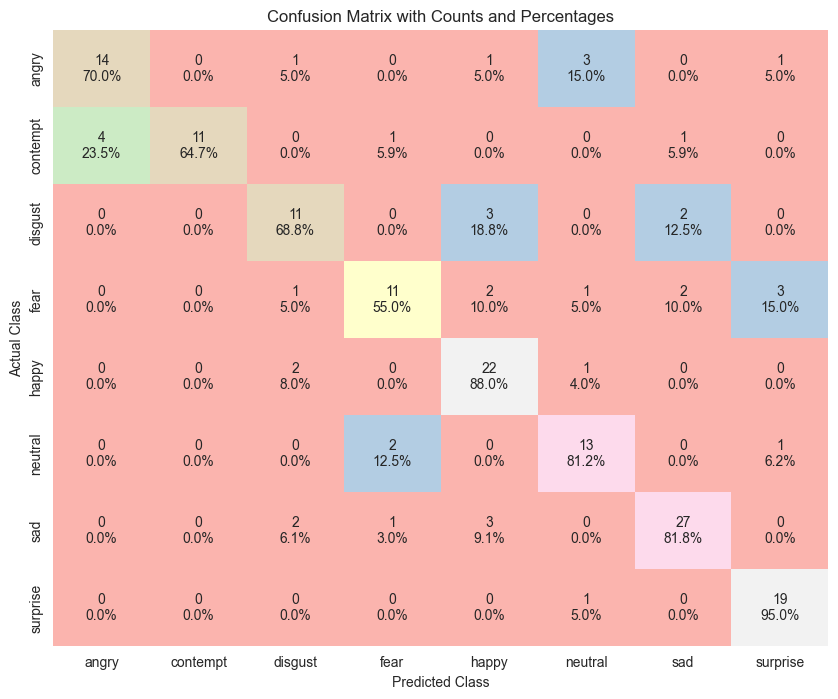

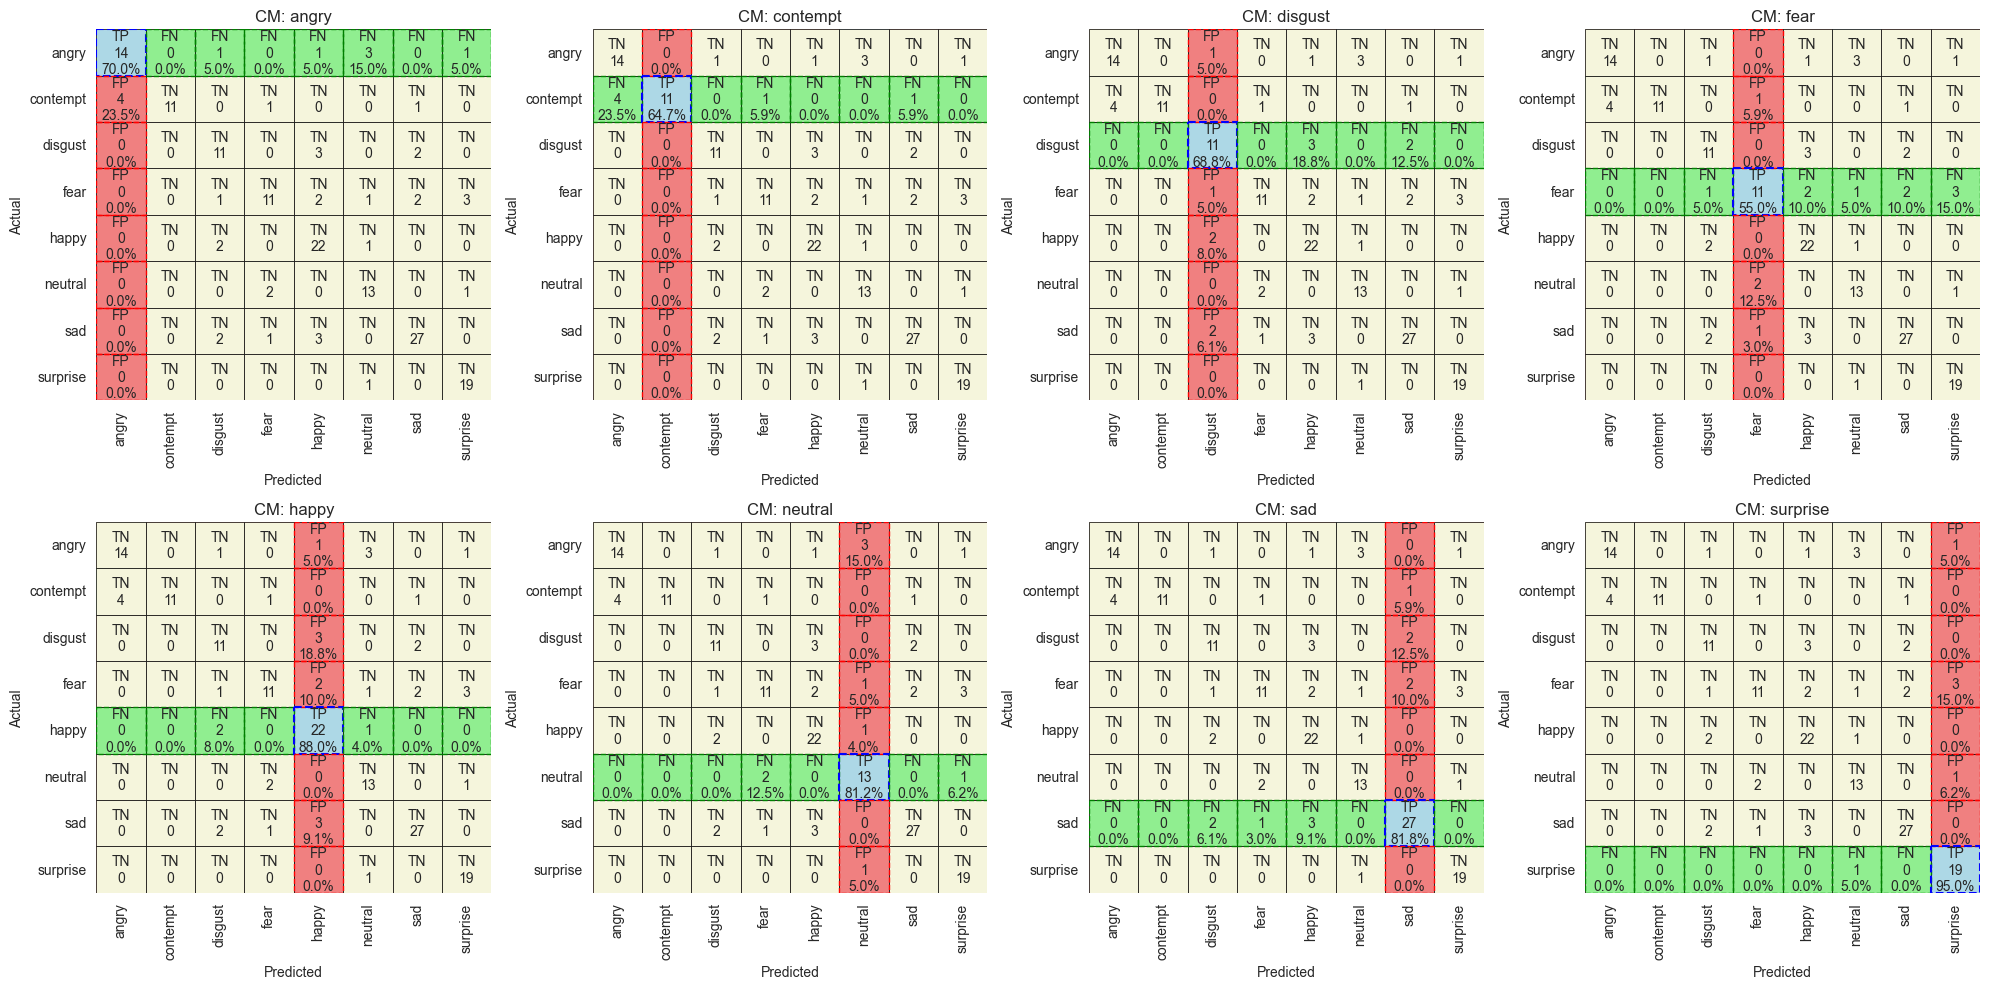

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.700000,0.300000,0.972789,0.027211,0.777778,0.222222,0.959732,0.040268,0.736842
contempt,0.647059,0.352941,1.000000,0.000000,1.000000,0.000000,0.961538,0.038462,0.785714
disgust,0.687500,0.312500,0.960265,0.039735,0.647059,0.352941,0.966667,0.033333,0.666667
fear,0.550000,0.450000,0.972789,0.027211,0.733333,0.266667,0.940789,0.059211,0.628571
happy,0.880000,0.120000,0.936620,0.063380,0.709677,0.290323,0.977941,0.022059,0.785714
neutral,0.812500,0.187500,0.960265,0.039735,0.684211,0.315789,0.979730,0.020270,0.742857
sad,0.818182,0.181818,0.962687,0.037313,0.843750,0.156250,0.955556,0.044444,0.830769
surprise,0.950000,0.050000,0.965986,0.034014,0.791667,0.208333,0.993007,0.006993,0.863636


                                       Valor
Recall (Sensitivity)                0.755655
Miss Rate                           0.244345
Specificity (Selectivity)           0.966425
Fallout                             0.033575
Precision                           0.773434
False Discovery Rate (FDR)          0.226566
Negative Predictive Value (NPV)     0.966870
False Omission Rate (FOR)           0.033130
F1 Score                            0.755096
MCC                                 0.733105
Accuracy                           76.646707
Training Time                    1547.118300
Inference Time                      4.452235


In [48]:
model_index = 4
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

### Dense

Layer (type:depth-idx)                   Output Shape              Param #
CustomDenseNet                           [32, 8]                   --
├─Conv2d: 1-1                            [32, 32, 224, 224]        576
├─DenseBlock: 1-2                        [32, 224, 224, 224]       --
│    └─Sequential: 2-1                   [32, 224, 224, 224]       --
│    │    └─BasicBlock: 3-1              [32, 48, 224, 224]        4,672
│    │    └─BasicBlock: 3-2              [32, 64, 224, 224]        7,008
│    │    └─BasicBlock: 3-3              [32, 80, 224, 224]        9,344
│    │    └─BasicBlock: 3-4              [32, 96, 224, 224]        11,680
│    │    └─BasicBlock: 3-5              [32, 112, 224, 224]       14,016
│    │    └─BasicBlock: 3-6              [32, 128, 224, 224]       16,352
│    │    └─BasicBlock: 3-7              [32, 144, 224, 224]       18,688
│    │    └─BasicBlock: 3-8              [32, 160, 224, 224]       21,024
│    │    └─BasicBlock: 3-9              [32, 176, 224,

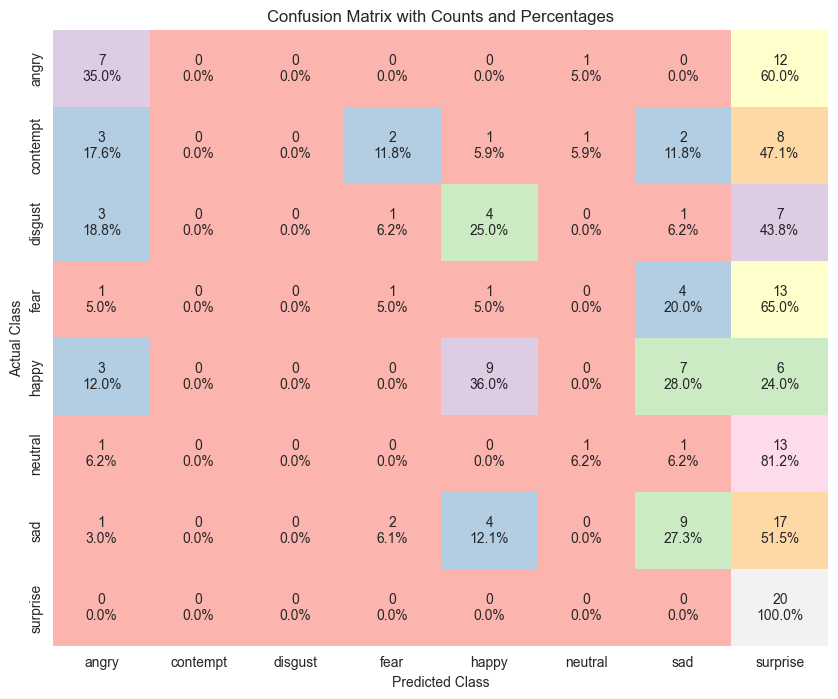

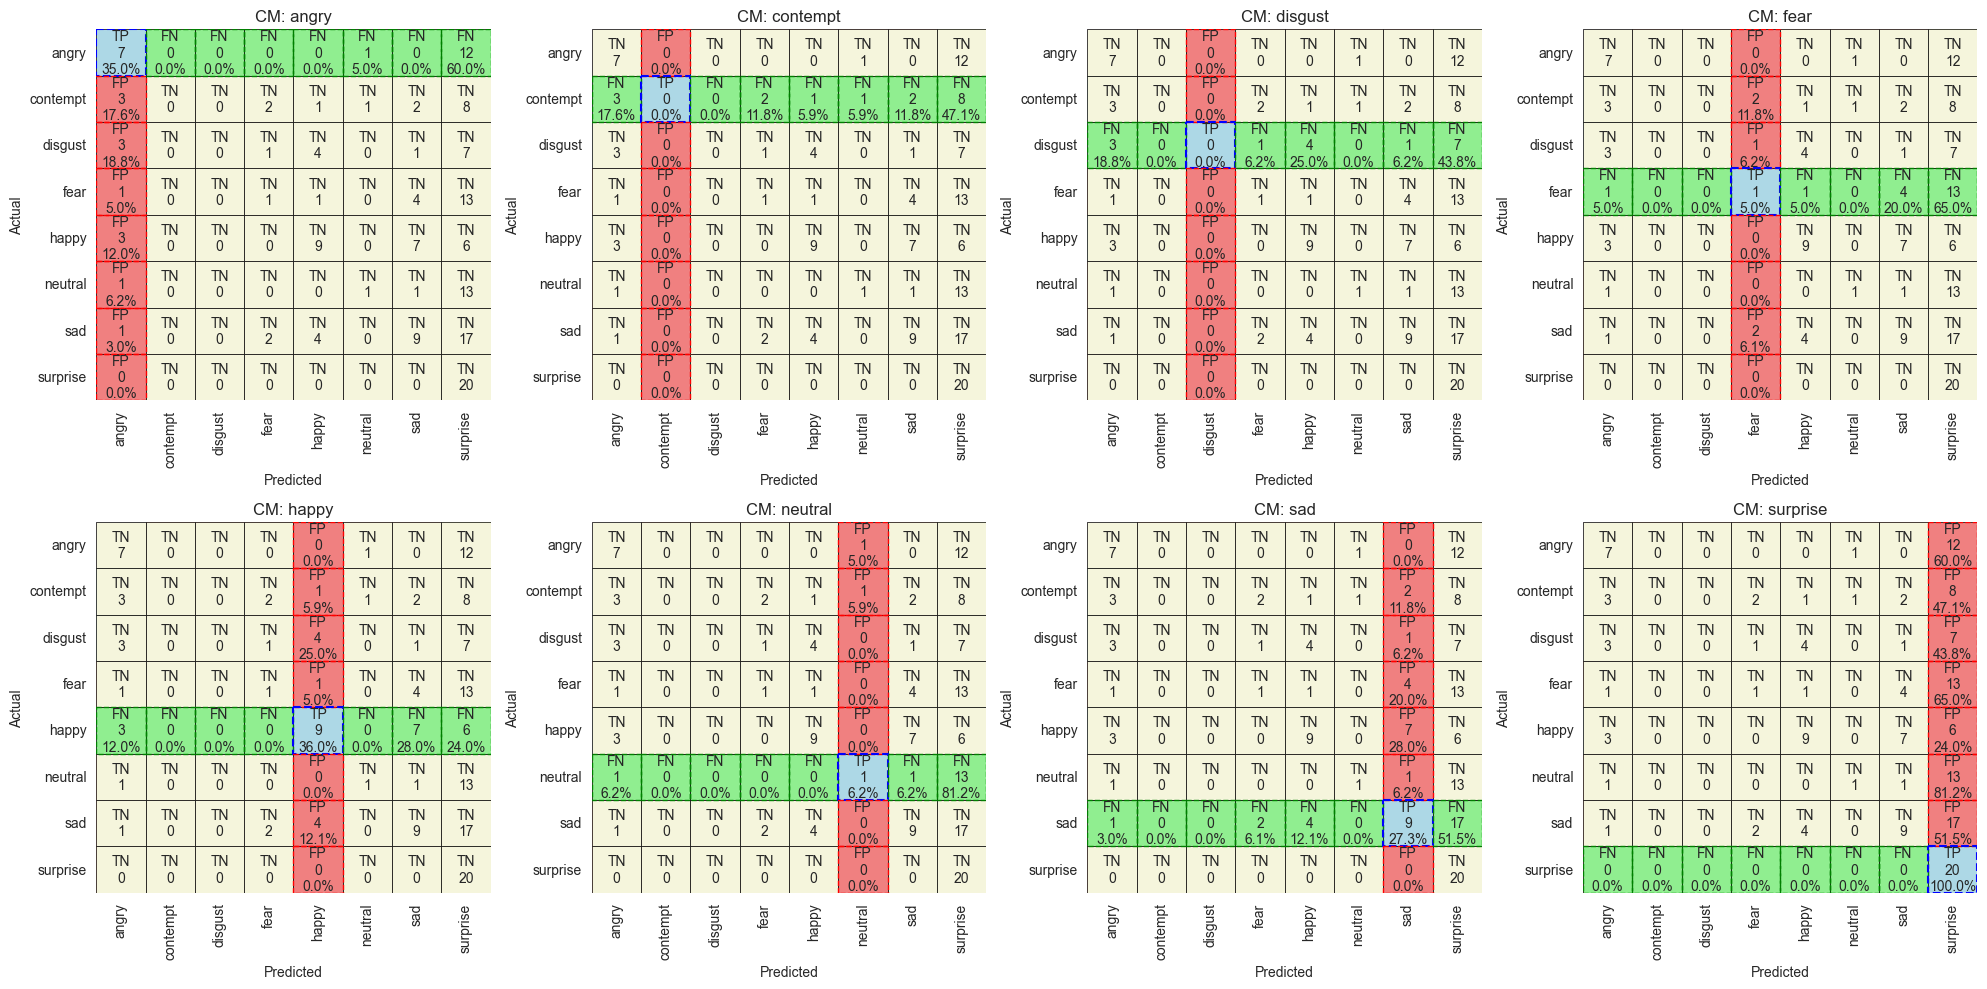

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.350000,0.650000,0.918367,0.081633,0.368421,0.631579,0.912162,0.087838,0.358974
contempt,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.898204,0.101796,0.000000
disgust,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.904192,0.095808,0.000000
fear,0.050000,0.950000,0.965986,0.034014,0.166667,0.833333,0.881988,0.118012,0.076923
happy,0.360000,0.640000,0.929577,0.070423,0.473684,0.526316,0.891892,0.108108,0.409091
neutral,0.062500,0.937500,0.986755,0.013245,0.333333,0.666667,0.908537,0.091463,0.105263
sad,0.272727,0.727273,0.888060,0.111940,0.375000,0.625000,0.832168,0.167832,0.315789
surprise,1.000000,0.000000,0.482993,0.517007,0.208333,0.791667,1.000000,0.000000,0.344828


                                       Valor
Recall (Sensitivity)                0.261903
Miss Rate                           0.738097
Specificity (Selectivity)           0.896467
Fallout                             0.103533
Precision                           0.240680
False Discovery Rate (FDR)          0.759320
Negative Predictive Value (NPV)     0.903643
False Omission Rate (FOR)           0.096357
F1 Score                            0.201359
MCC                                 0.178785
Accuracy                           28.143713
Training Time                    1148.267000
Inference Time                      2.157525


In [49]:
model_index = 5
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

Layer (type:depth-idx)                   Output Shape              Param #
DenseNet                                 [32, 8]                   --
├─Conv2d: 1-1                            [32, 48, 224, 224]        864
├─DenseBlock: 1-2                        [32, 144, 224, 224]       --
│    └─Sequential: 2-1                   [32, 144, 224, 224]       --
│    │    └─BasicBlock: 3-1              [32, 72, 224, 224]        10,464
│    │    └─BasicBlock: 3-2              [32, 96, 224, 224]        15,696
│    │    └─BasicBlock: 3-3              [32, 120, 224, 224]       20,928
│    │    └─BasicBlock: 3-4              [32, 144, 224, 224]       26,160
├─TransitionBlock: 1-3                   [32, 28, 112, 112]        --
│    └─BatchNorm2d: 2-2                  [32, 144, 224, 224]       288
│    └─ReLU: 2-3                         [32, 144, 224, 224]       --
│    └─Conv2d: 2-4                       [32, 28, 224, 224]        4,032
├─DenseBlock: 1-4                        [32, 124, 112, 112]    

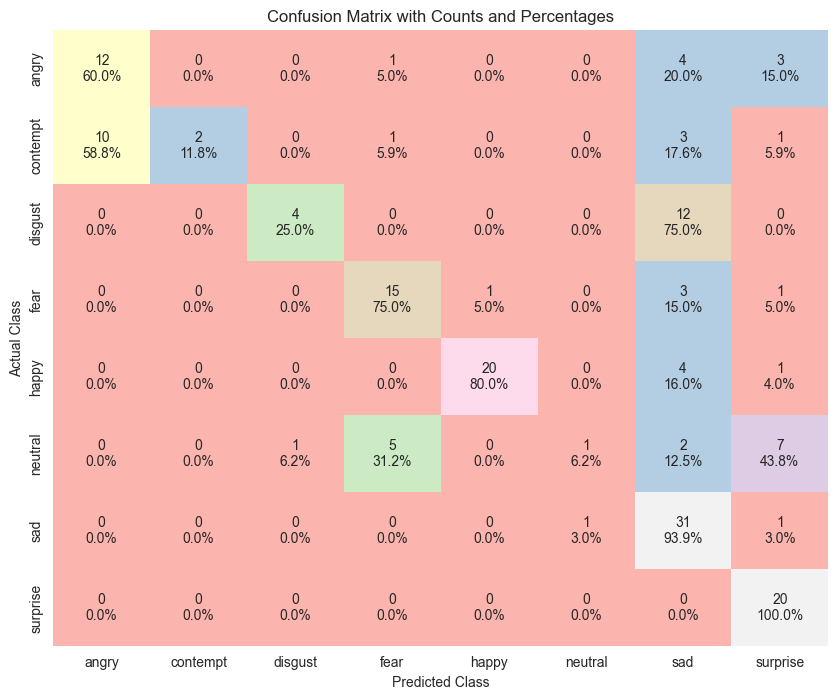

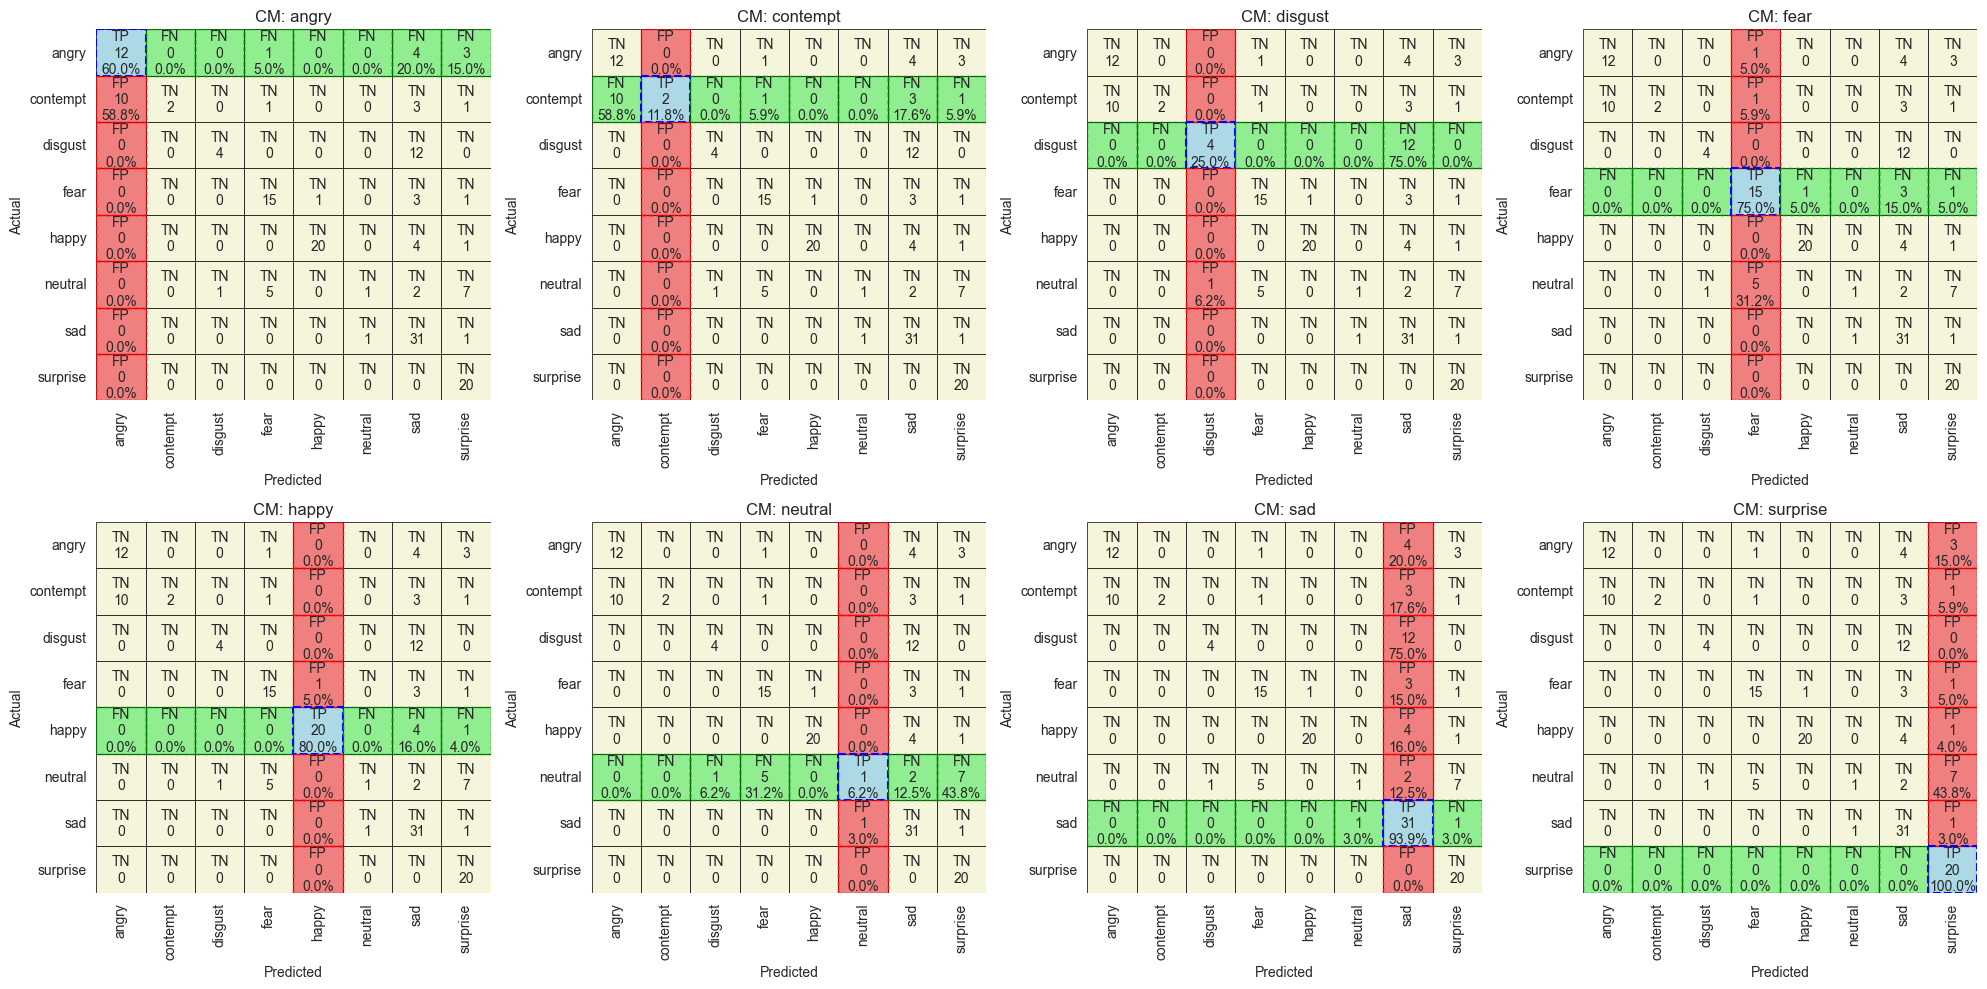

,Recall (Sensitivity),Miss Rate,Specificity (Selectivity),Fallout,Precision,False Discovery Rate (FDR),Negative Predictive Value (NPV),False Omission Rate (FOR),F1 Score
Class,,,,,,,,,
angry,0.600000,0.400000,0.931973,0.068027,0.545455,0.454545,0.944828,0.055172,0.571429
contempt,0.117647,0.882353,1.000000,0.000000,1.000000,0.000000,0.909091,0.090909,0.210526
disgust,0.250000,0.750000,0.993377,0.006623,0.800000,0.200000,0.925926,0.074074,0.380952
fear,0.750000,0.250000,0.952381,0.047619,0.681818,0.318182,0.965517,0.034483,0.714286
happy,0.800000,0.200000,0.992958,0.007042,0.952381,0.047619,0.965753,0.034247,0.869565
neutral,0.062500,0.937500,0.993377,0.006623,0.500000,0.500000,0.909091,0.090909,0.111111
sad,0.939394,0.060606,0.791045,0.208955,0.525424,0.474576,0.981481,0.018519,0.673913
surprise,1.000000,0.000000,0.904762,0.095238,0.588235,0.411765,1.000000,0.000000,0.740741


                                      Valor
Recall (Sensitivity)               0.564943
Miss Rate                          0.435057
Specificity (Selectivity)          0.944984
Fallout                            0.055016
Precision                          0.699164
False Discovery Rate (FDR)         0.300836
Negative Predictive Value (NPV)    0.950211
False Omission Rate (FOR)          0.049789
F1 Score                           0.534065
MCC                                0.575706
Accuracy                          62.874251
Training Time                    389.437600
Inference Time                    22.917539


In [50]:
model_index = 6
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

In [51]:
model_index = 7
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

In [ ]:
model_index = 8
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

In [ ]:
model_index = 9
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

In [ ]:
model_index = 10
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)

In [ ]:
model_index = 11
model, cm, classes_df, macro_df = load_model_and_metrics(model_index)
print_model_summary(model, Two_channel_in)
plot_confuse_matrix(cm, label_names)
plot_all_class_cm(cm, label_names, per_row=4)
display(classes_df)
print(macro_df)